In [6]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
import datetime
import numpy as np
import re
from matplotlib.pylab import rcParams
import sqlite3
import seaborn as sns; sns.set()
from tqdm import tqdm
rcParams['figure.figsize'] = 12, 10
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=2.558024, expected=8.900000
predicted=4.929360, expected=10.200000
predicted=7.179815, expected=0.900000
predicted=4.999854, expected=3.400000
predicted=4.434315, expected=9.200000
predicted=6.565355, expected=0.600000
predicted=4.569294, expected=4.100000
predicted=4.023618, expected=5.100000
predicted=4.285243, expected=0.900000
predicted=3.474975, expected=0.200000
predicted=2.149037, expected=4.400000
predicted=2.901095, expected=0.200000
predicted=2.021289, expected=4.400000
predicted=2.674512, expected=-3.700000
predicted=0.263798, expected=1.800000
predicted=1.179536, expected=7.700000
predicted=3.249245, expected=7.300000
predicted=4.433323, expected=8.000000
predicted=5.276384, expected=-0.200000
predicted=3.518956, expected=2.200000
predicted=3.969919, expected=0.100000
predicted=2.910230, expected=-3.300000
predicted=0.754733, expected=-1.900000
predicted=-0.575532, expected=0.600000
predicted=-0.328074, expected=0.000000
predicted=-0.392135, expected=-1.000000
pre

predicted=-5.047569, expected=-3.200000
predicted=-4.596281, expected=-5.500000
predicted=-5.000079, expected=-0.300000
predicted=-3.579283, expected=0.300000
predicted=-2.004980, expected=-4.300000
predicted=-2.621253, expected=-0.200000
predicted=-1.798159, expected=-7.200000
predicted=-3.556467, expected=-1.200000
predicted=-2.310992, expected=-8.900000
predicted=-5.057514, expected=-3.000000
predicted=-4.062887, expected=-7.900000
predicted=-5.835656, expected=-4.200000
predicted=-5.057630, expected=-3.400000
predicted=-4.832387, expected=-5.500000
predicted=-4.990473, expected=-5.000000
predicted=-5.039177, expected=-9.700000
predicted=-6.595673, expected=-6.200000
predicted=-6.184769, expected=-2.300000
predicted=-5.039053, expected=-4.700000
predicted=-5.073140, expected=-5.900000
predicted=-5.582336, expected=-13.100000
predicted=-8.077516, expected=-6.900000
predicted=-7.122142, expected=-8.200000
predicted=-7.681684, expected=-7.100000
predicted=-7.662931, expected=-6.400000


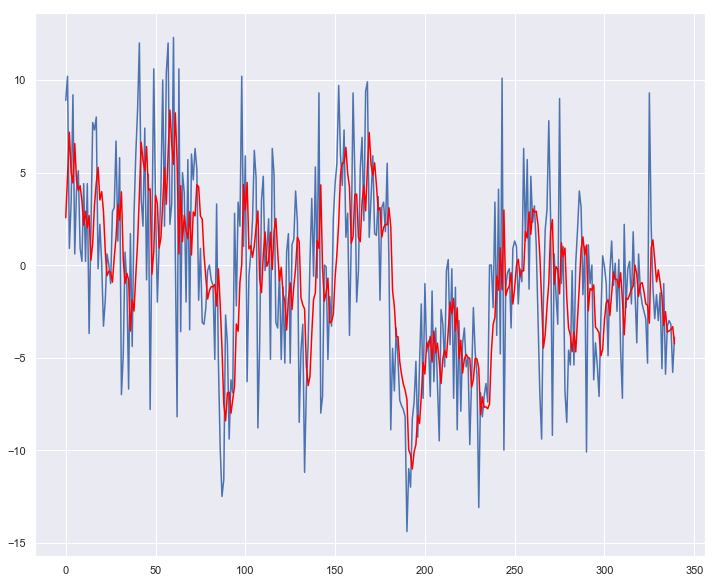

In [23]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()